## Wykres rozkładu normalnego
Opis wykresu:
1. Rodzaj wykresu: Box plot to narzędzie do oglądania danych numerycznych.
2. Skrzynka (box): Każda skrzynka pokazuje, gdzie znajduje się większość danych. Linia wewnątrz skrzynki to mediana (wartość środkowa danych).
3. Wąsy: One pokazują, jak szeroki jest zakres danych, wyznaczony przez IQR (interkwartylowy zakres), czyli od pierwszego do trzeciego kwartyla.
4. Wartości odstające: Punkty poza wąsami są uznawane za nietypowe wartości, co może sugerować anomalię w danych.

Age                   Axes(0.125,0.653529;0.168478x0.226471)
Work_Experience    Axes(0.327174,0.653529;0.168478x0.226471)
Family_Size        Axes(0.529348,0.653529;0.168478x0.226471)
dtype: object

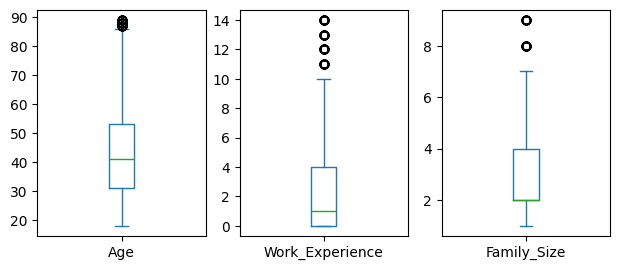

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# Wczytanie danych
df = pd.read_csv('train.csv')

# Usunięcie brakujących wartości
df = df.dropna().reset_index(drop=True)
df = df.drop(columns=['ID'])
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

## Pierwsze 10 rekordów z database
W celu pokazania struktury i danych zawartych w zbiorze danych wyświetlono dziesięć wierszy z datasetu. 

In [98]:
df.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
5,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
6,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
7,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C
8,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,A
9,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D


## Wykres zależności między cechami
Pozwala na zobrazowanie zależności między cechami a zmienną predykowaną

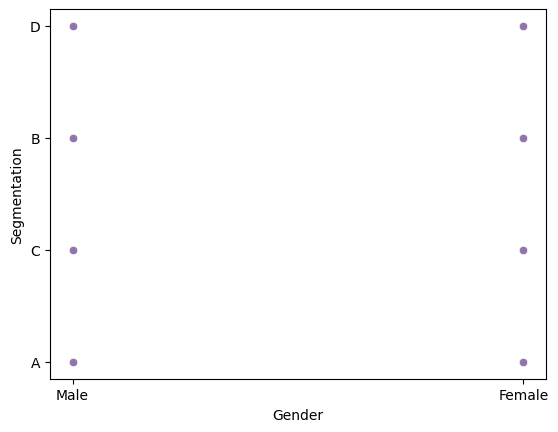

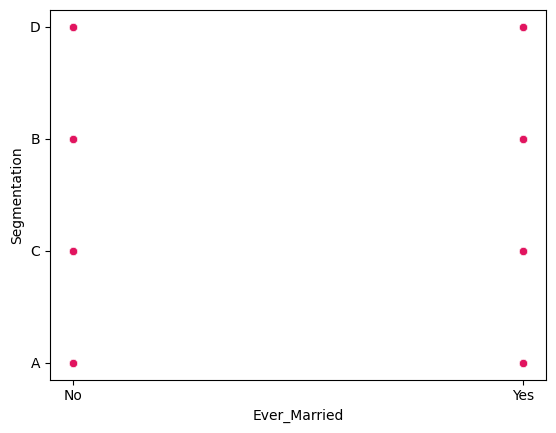

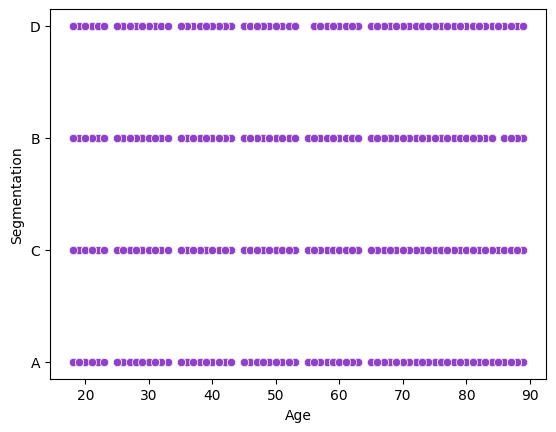

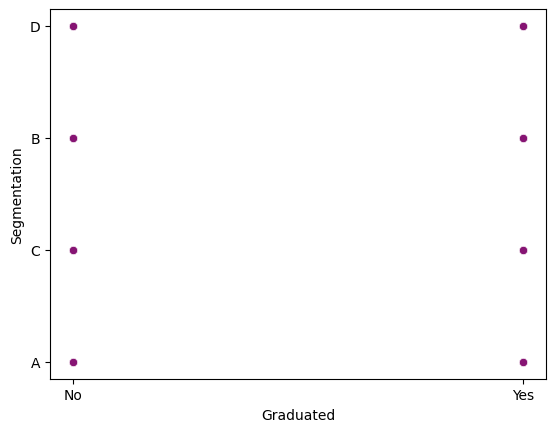

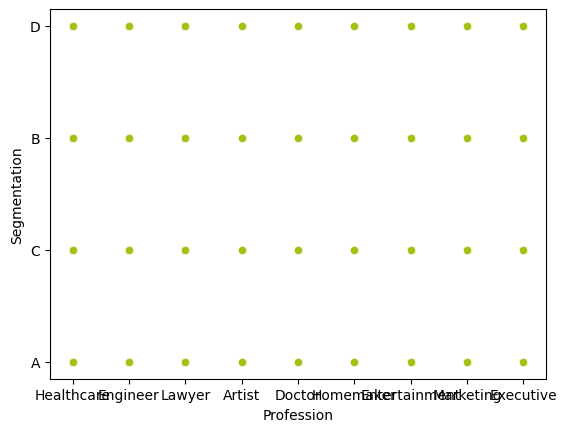

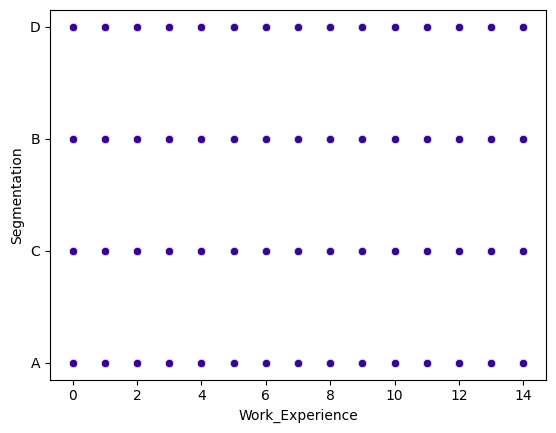

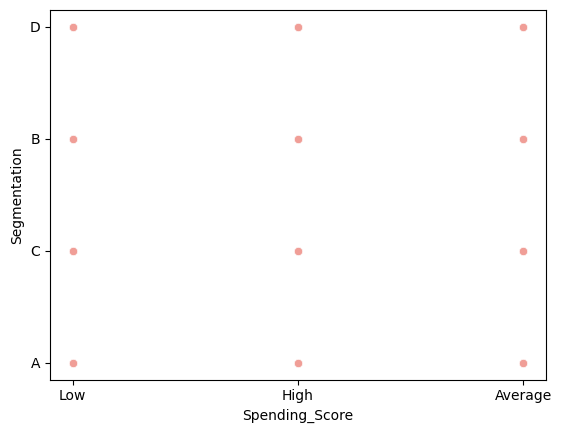

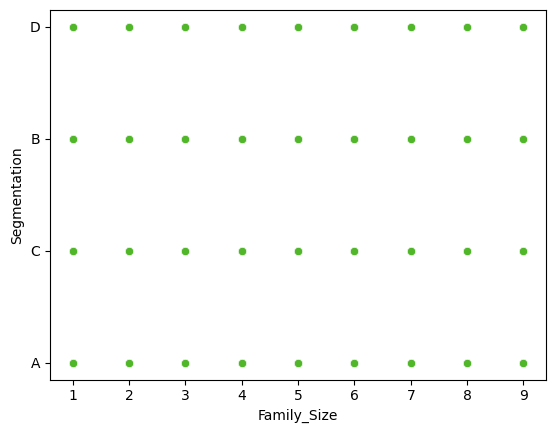

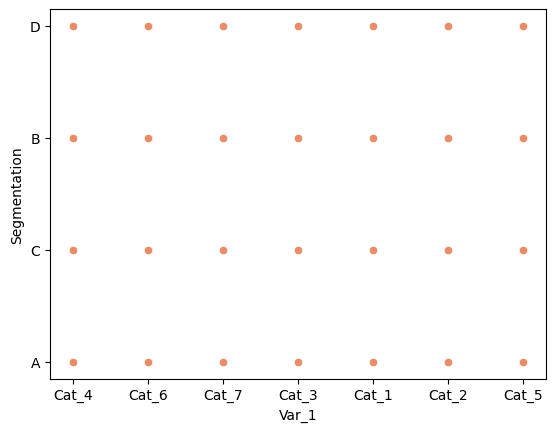

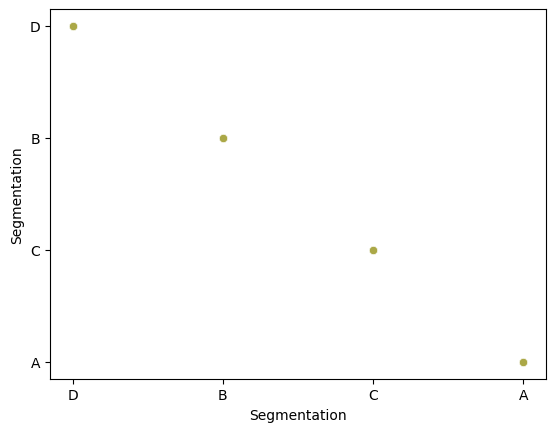

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
for i in df.columns:
    red = float(random.randint(0, 256)/255)
    green = float(random.randint(0, 256)/255)
    blue = float(random.randint(0, 256)/255)
    plt.figure()
    sns.scatterplot(x=df[i],y='Segmentation',data=df, color=(red, green, blue))

## Ilość mężczyzn i kobiet w datasecie
Zadaniem wykresu jest porównanie ilości mężczyzn i kobiet, których dane są zawarte w zbiorze danych

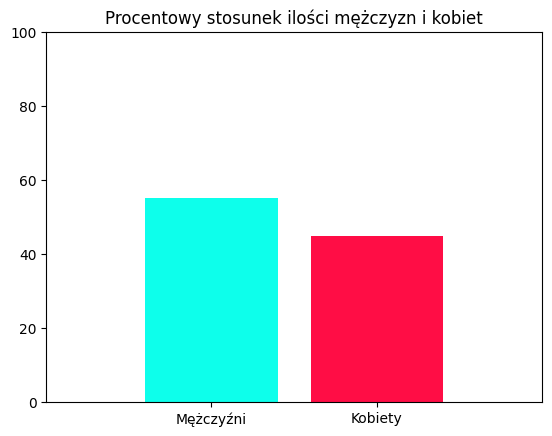

In [55]:
males = df[df['Gender'] == 'Male']

percent_of_males = (len(males) / len(df)) * 100
percent_of_females = 100-percent_of_males

x = ['Mężczyźni', 'Kobiety']
y = [percent_of_males, percent_of_females]
plt.bar(x, y, color=['#0dffeb', '#ff0d45'])
plt.ylim(0, 100)
plt.xlim(-1, 2)
plt.title('Procentowy stosunek ilości mężczyzn i kobiet')
plt.show()

## Wykres wieku
Poniższy wykres pokazuje ilość osób pod względem wieku. Widoczne jest, że większość osób jest w wieku pomiędzy 18, a 55 rokiem życia

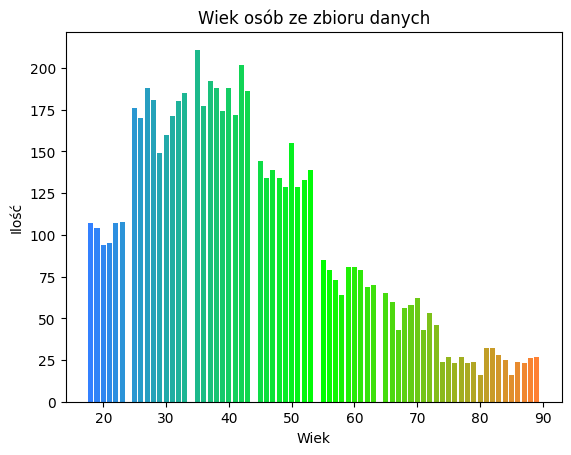

In [80]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np 

temp = df["Age"].value_counts()
temp.sort_values(ascending=False)
x = temp.sort_index(ascending=False).index
y = temp.sort_index(ascending=False).values

colors = [(1, 0.5, 0.2), (0, 1, 0), (0.2, 0.5, 1)]
cmap_name = 'custom_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(x))

plt.bar(x, y, color=cm(np.linspace(0, 1, len(x))))
plt.title('Wiek osób ze zbioru danych')
plt.xlabel('Wiek')
plt.ylabel('Ilość')
plt.show()

## Profesja
Poniższy wykres ilustruje profesje osób ze zbioru danych

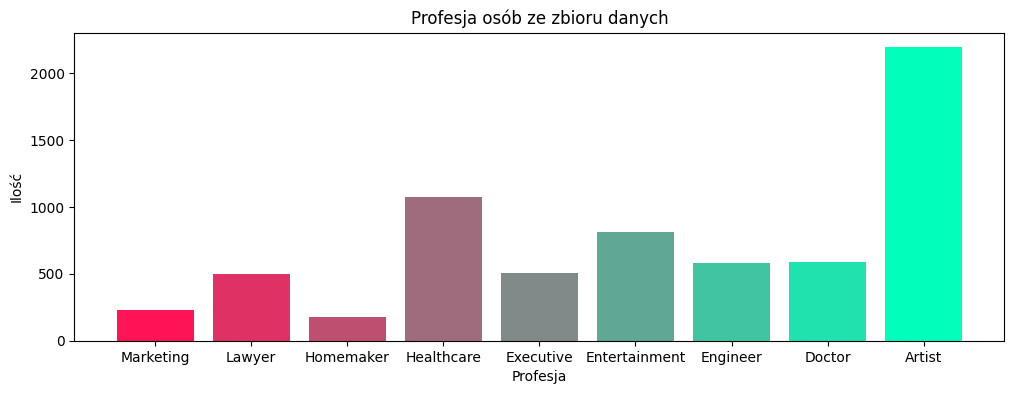

In [97]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np 

temp = df["Profession"].value_counts()
temp.sort_values(ascending=False)
x = temp.sort_index(ascending=False).index
y = temp.sort_index(ascending=False).values

colors = ['#ff1457', '#00ffbb']
cmap_name = 'custom_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(x))

plt.figure(figsize=(12, 4))
plt.bar(x, y, color=cm(np.linspace(0, 1, len(x))))
plt.title('Profesja osób ze zbioru danych')
plt.xlabel('Profesja')
plt.ylabel('Ilość')
plt.show()

## Wykres wykształcenia wyższego
Wykres wizualizuje różnice w ilości osób posiadających i nieposiadających wykształcenie wyższe

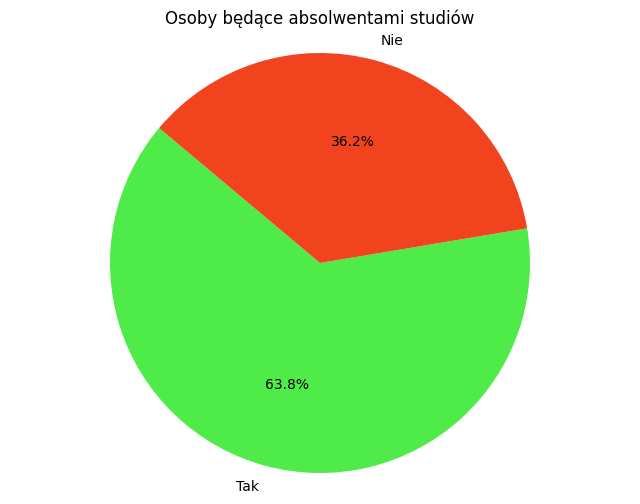

In [108]:
import matplotlib.pyplot as plt

segmentation_counts = df['Graduated'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(segmentation_counts, labels=['Tak', 'Nie'], autopct='%1.1f%%', startangle=140, colors=['#4eeb49', '#f2431f'])
plt.title('Osoby będące absolwentami studiów')
plt.axis('equal')
plt.show()
